### Computational Guided Inquiry for Modeling Earth's Climate (Neshyba, 2025)

# Make an Emission Scenario
The idea of this module is to create an emissions scenario -- a _schedule_ -- that describes how much carbon humans have released to the atmosphere in the past, and that makes projections about future emissions. We've done this before (ScheduledFlows), but this will allow us to specify long-term emissions.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import meclib.cl as cl

In [3]:
%matplotlib inline

### Using ScheduledFlowsWithLTE
In the cell below, we calculate and plot an emissions scenario, $\epsilon (t)$, using MakeEmissionsScenarioLTE (which includes long-term emissions).

peak 15.252233588429393 434


Text(0, 0.5, 'GtC/year')

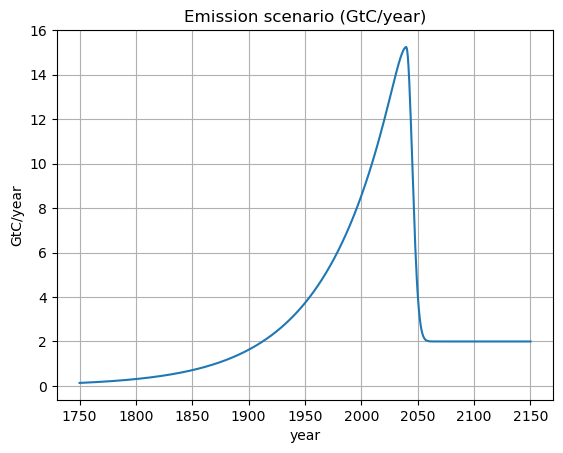

In [5]:
# Parameters
t_start = 1750
t_stop = 2150
nsteps = 600
t = np.linspace(t_start,t_stop,nsteps)
t_peak = 2040
t_decarb = 15
k = 0.0166
t_0 = 2003
eps_0 = 9
epslongterm = 2
t_decarb_ppf_factor = 0.5

# Create the scenario
t, myeps = cl.MakeEmissionsScenarioLTE(\
    t_start, t_stop, nsteps, k, eps_0, t_0, t_peak, t_decarb,epslongterm=epslongterm, t_decarb_ppf_factor=t_decarb_ppf_factor)

# Plot the scenario
plt.figure()
plt.plot(t,myeps)
plt.grid(True)
plt.title('Emission scenario (GtC/year)')
plt.xlabel('year')
plt.ylabel('GtC/year')

### Saving your emissions scenario
In the cell below we create the dictionary, etc., and save it to a file.

In [7]:
# Create an empty dictionary
epsdictionary = dict()

# Create an empty dataframe
epsdf = pd.DataFrame()

# Insert the time and emissions columns into the dataframe
epsdf.insert(loc=0, column='time', value=t)
epsdf.insert(loc=1, column='emissions', value=myeps)

# Add the dataframe to the dictionary
epsdictionary['dataframe']=epsdf

# Add metadata
epsdictionary['t_0'] = t_0
epsdictionary['eps_0'] = eps_0
epsdictionary['t_peak'] = t_peak
epsdictionary['t_decarb'] = t_decarb
epsdictionary['t_decarb'] = t_decarb_ppf_factor
epsdictionary['k'] = k
epsdictionary['description'] = 'This is an emission scenario that peaks in the year 2040, with long-term emissions continuing after that'

# Report the contents of the dictionary
display(epsdictionary)

{'dataframe':             time  emissions
 0    1750.000000   0.134987
 1    1750.667780   0.136492
 2    1751.335559   0.138013
 3    1752.003339   0.139552
 4    1752.671119   0.141107
 ..           ...        ...
 595  2147.328881   2.000000
 596  2147.996661   2.000000
 597  2148.664441   2.000000
 598  2149.332220   2.000000
 599  2150.000000   2.000000
 
 [600 rows x 2 columns],
 't_0': 2003,
 'eps_0': 9,
 't_peak': 2040,
 't_decarb': 0.5,
 'k': 0.0166,
 'description': 'This is an emission scenario that peaks in the year 2040, with long-term emissions continuing after that'}

### Saving your emissions scenario
Use the cell below to save your emissions scenario (the entire dictionary -- data and metadata) as a pickle file. 

In [11]:
# Assign a name for the file, and save it
filename = 'Peaks_in_2040_LTE.pkl'
cl.SaveMyScenario(epsdictionary, filename)